In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from qiskit.visualization.bloch import Bloch
from sympy.physics.matrices import msigma
from sympy.physics.quantum.dagger import Dagger
from sympy import Matrix
from sympy import I, N, re, exp, sin, cos, sqrt, pi, eye
import numpy as np

In [2]:
def cartesian_to_spherical(vec):
    x = np.real(vec[0])
    y = np.real(vec[1])
    z = np.real(vec[2])
    hxy = np.hypot(x, y)
    r = np.hypot(hxy, z)
    ϕ = np.arctan2(y, x) #az
    θ = np.arctan2(hxy, z) #el
    return [r, ϕ, θ]

In [3]:
def qubitmatrix_to_cartesian(M_q):
    M_q = N(M_q)
    q_1 = re((M_q[0,1] + M_q[1,0]) / 2)
    q_2 = re((M_q[0,1] - M_q[1,0]) / 2*I)
    q_3 = re(M_q[0,0])
    return np.array([q_1, q_2, q_3], dtype=np.float64)

In [4]:
def get_gradient_colors(rgb, n):
    red=rgb[0] 
    yel=rgb[1]
    blu=rgb[2]
    result = [colors.to_hex([red,yel,blu])]
    cr = red/n
    cy = yel/n
    cb = blu/n
    for i in range(n):
        if(red!=0):
            red -= cr 
        if(yel!=0):
            yel -= cy
        if(blu!=0):
            blu -= cb
        result.append(colors.to_hex([red,yel,blu]))
    return result

In [5]:
def rn_su2_euler(vec, rx, ry, rz):
    spherical_vec = cartesian_to_spherical(vec)
    ϕ = spherical_vec[1]
    θ = spherical_vec[2]
    sx = msigma(1)
    sy = msigma(2)
    sz = msigma(3)
    M_q = (sin(θ)*cos(ϕ)*sx + sin(θ)*sin(ϕ)*sy + cos(θ)*sz)
    U_n = Matrix([[exp(-I*(rx+rz)/2)*cos(ry/2), -exp(-I*(rx-rz)/2)*sin(ry/2)], [exp(I*(rx-rz)/2)*sin(ry/2), exp(I*(rx+rz)/2)*cos(ry/2)]])
    M_q_rotated = U_n*M_q*Dagger(U_n)
    return M_q_rotated

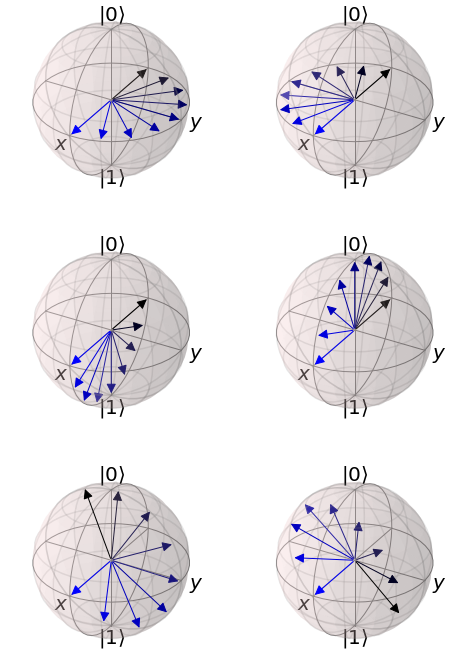

In [6]:
fig, ax = plt.subplots(figsize = [8, 12], nrows=3, ncols=2)
fig.patch.set_facecolor('white')
[axis.set_axis_off() for axis in ax.ravel()]

rotations = [[0, 0, pi/8], [0, 0, -pi/8], [0, pi/8, 0], [0, -pi/8, 0], [0, pi/8, pi/8], [0, -pi/8, -pi/8]]
start_vec = [1, 0, 0]
num_iterations = 8

for m, rotation in enumerate(rotations):
    ax = fig.add_subplot(320+(m+1), axes_class = Axes3D)
    
    rot_x = rotation[0]
    rot_y = rotation[1]
    rot_z = rotation[2]
    _bloch = Bloch(axes=ax)
    _bloch.vector_color = get_gradient_colors([0, 0, 1], num_iterations)
    _bloch.vector_width = 1
    sv = []
    vec = start_vec
    sv.append(vec)
    for i in range(num_iterations):
        M_q_rotated = rn_su2_euler(vec, rot_x, rot_y, rot_z)
        vec = qubitmatrix_to_cartesian(M_q_rotated)
        sv.append(vec)

    _bloch.add_vectors(sv)
    _bloch.render()